In [18]:
import pandas as pd
import requests
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [64]:
base_url = 'https://api.stlouisfed.org//fred/'

In [65]:
FRED_key = '429c7bb6ba1c72479e276f06b345db1d'
obs_endpoint = 'series/observations'

In [66]:
series_id = 'GDP'
start_date = '2009-01-01'
end_date = str(date.today())
ts_frequency = 'q'
ts_unit = 'pc1'

In [67]:
obs_params = {
    'series_id': series_id,
    'api_key': FRED_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date
}

In [70]:
response = requests.get(base_url+obs_endpoint,params=obs_params)

In [72]:
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    obs_data.set_index('date', inplace= True)
    obs_data['value'] = obs_data['value'].astype(float)
else:
    print('Failed to retrvie data. Status code:')

In [ ]:
obs_data['value']

,realtime_start,realtime_end,value
date,,,
2009-01-01,2024-11-29,2024-11-29,14430.902
2009-04-01,2024-11-29,2024-11-29,14381.236
2009-07-01,2024-11-29,2024-11-29,14448.882
2009-10-01,2024-11-29,2024-11-29,14651.249
2010-01-01,2024-11-29,2024-11-29,14764.610
...,...,...,...
2023-07-01,2024-11-29,2024-11-29,27967.697
2023-10-01,2024-11-29,2024-11-29,28296.967
2024-01-01,2024-11-29,2024-11-29,28624.069


C:\Users\wkaco\AppData\Local\Temp\ipykernel_8420\4202450855.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


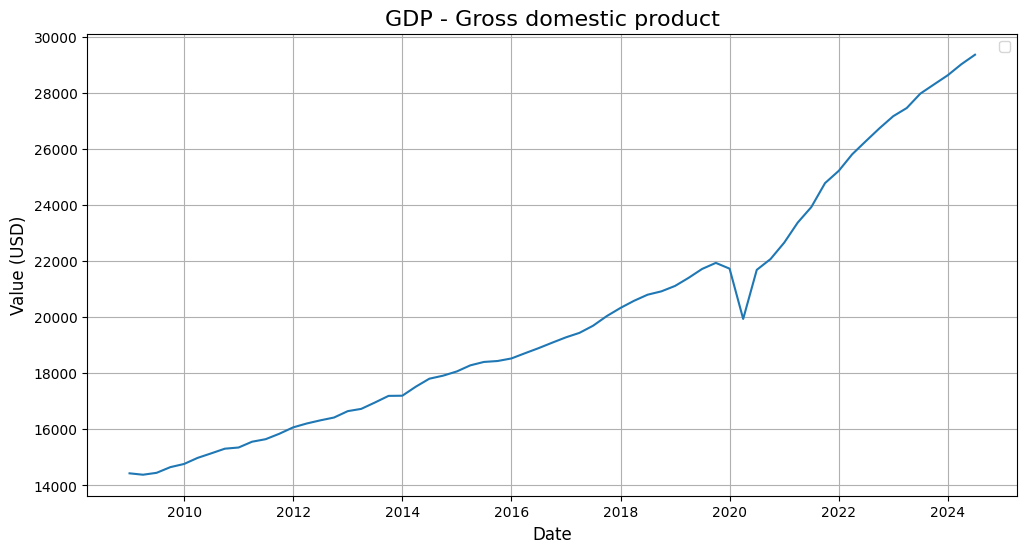

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(obs_data['value'])
plt.title('GDP - Gross domestic product', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()